## Regression exercise
#### ## Welcome in the part 1!!

We are going to work with randomly generalize data and trying to fit different polynomial regressions to it and explore how our loss function behaves. We will use the formulas we introduced in theoretical sections and we will create linear regression model from scratch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [2]:
# original function: returns numpy array

# def psi(x, m):
#     return np.power(x, np.arange(m+1))

In [3]:
# returns list
def psi(x,m):
    psi = []
    for i in range(m+1):
        psi.append(x**i)
    return psi

#### Task 2

Write a function $h(x,\alpha)$ defined as $h(x,\alpha)=\alpha^T\psi(x)$

In [4]:
def h(x, alpha, m):
    return np.dot(alpha, psi(x, m))

In [5]:
# original function: needed 3 parameters, and to return dot product
# this was my original intuition, just wasn't completely sure because of the question 

# def h(x, a):
#     m = a.shape[0]
#     return np.transpose(a) * psi(x, m)

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [6]:
p3 = np.poly1d([1,-3, 2,-1])

In [7]:
# def p3(x):
#     return 3*x**3 - 5*x + 6

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

In [8]:
# this doesn't really matter

In [9]:
# interval is [-3,5]

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [10]:
# original array of 30 values, specific to interval [-2,2]

# xs = np.random.uniform(-2,2,30)

In [11]:
xs = (np.random.random_sample(30) * 8 ) - 3

In [12]:
xs

array([-0.54278075,  1.19272247,  1.14301131, -0.42798391, -2.91881136,
        4.35769708,  0.16660008,  3.69361941, -2.85190098, -1.39255591,
        2.36883955, -2.06944107,  2.7055252 ,  0.24701847, -0.27531477,
       -1.26745085,  2.18327348,  4.76817742, -0.76849458,  4.48466748,
       -1.45281878, -0.48281882,  4.48501822,  4.01832019,  3.9013856 ,
        3.15320417,  1.31057202,  4.30791712,  0.46989563,  0.66269697])

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [13]:
ys = p3(xs)

In [14]:
ys

array([ -3.12930345,  -1.18556438,  -1.1400864 ,  -2.48387242,
       -57.26269796,  33.49741531,  -0.74544252,  15.85016654,
       -54.29929749, -12.30320877,   0.19598482, -26.84920113,
         2.25553413,  -0.67394483,  -1.79889258, -10.39026989,
        -0.52652952,  48.73678055,  -4.76260148,  37.82932705,
       -13.30412388,  -2.77753152,  37.8417546 ,  23.47935184,
        20.52258982,   6.82967086,  -1.2806158 ,  31.88835635,
        -0.6188606 ,  -0.70107306])

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

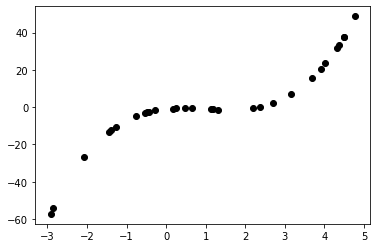

In [15]:
plt.scatter(xs, ys, color='black')
plt.show()

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [16]:
m = 2

In [17]:
def create_X(m):
    X = np.zeros([m+1,len(xs)])
    
    for i in range(len(list(xs))):
        X[:,i] = psi(list(xs)[i],m)
        
    return X

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

In [18]:
def compute_alpha(X, ys):
    return np.dot(np.dot(np.linalg.inv(np.dot(X, X.transpose())),X), ys)

In [19]:
X = create_X(2)

In [20]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.542781,1.192722,1.143011,-0.427984,-2.918811,4.357697,0.166600,3.693619,-2.851901,-1.392556,...,-1.452819,-0.482819,4.485018,4.018320,3.901386,3.153204,1.310572,4.307917,0.469896,0.662697
2,0.294611,1.422587,1.306475,0.183170,8.519460,18.989524,0.027756,13.642824,8.133339,1.939212,...,2.110682,0.233114,20.115388,16.146897,15.220810,9.942697,1.717599,18.558150,0.220802,0.439167


In [30]:
xs

array([-0.54278075,  1.19272247,  1.14301131, -0.42798391, -2.91881136,
        4.35769708,  0.16660008,  3.69361941, -2.85190098, -1.39255591,
        2.36883955, -2.06944107,  2.7055252 ,  0.24701847, -0.27531477,
       -1.26745085,  2.18327348,  4.76817742, -0.76849458,  4.48466748,
       -1.45281878, -0.48281882,  4.48501822,  4.01832019,  3.9013856 ,
        3.15320417,  1.31057202,  4.30791712,  0.46989563,  0.66269697])

In [21]:
alpha = compute_alpha(X, ys)

In [22]:
alpha

array([-6.83235954,  9.82734819, -0.37785361])

#### Task 10
Plot the data and the computed polynomial. Does it fit?

In [23]:
def plot_predictions(alpha, m, test=True):
    # we using "new" data now.
    if test:
        x = (np.random.random_sample(30) * 8) - 3
    else:
        x = xs
    y_est = []
    for i in range(len(list(x))):
        y_est.append(h(list(x)[i],alpha, m))
    plt.scatter(xs, ys, alpha=0.5, c="red")
    plt.scatter(x, y_est, alpha=0.5, c="blue")
    # plt.title('')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

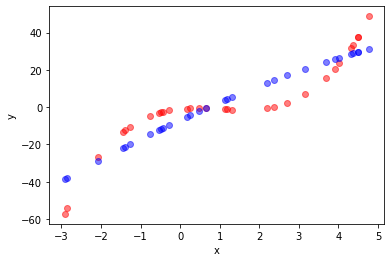

In [24]:
plot_predictions(alpha, m, test=False)

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

2


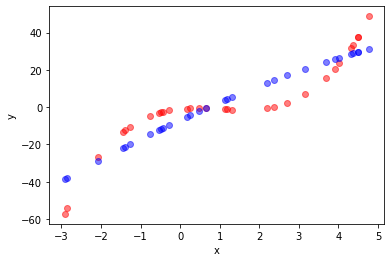

3


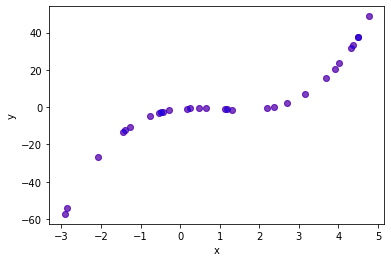

4


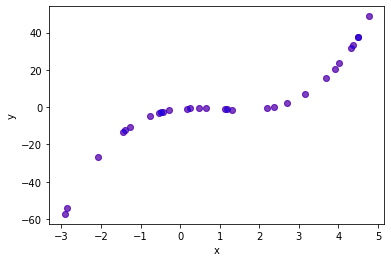

5


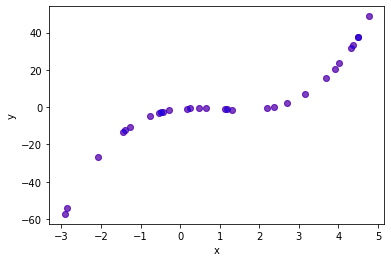

6


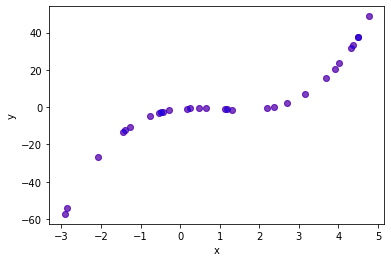

7


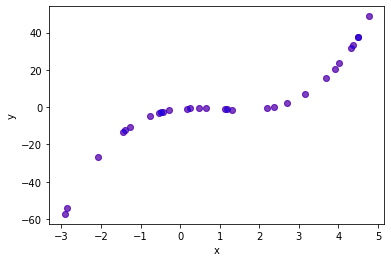

8


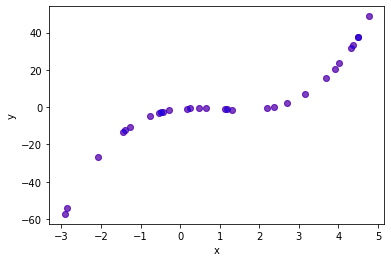

9


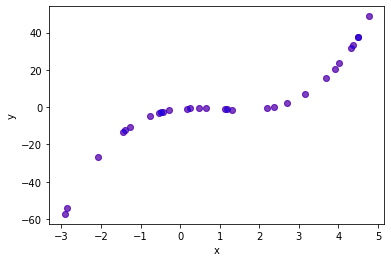

10


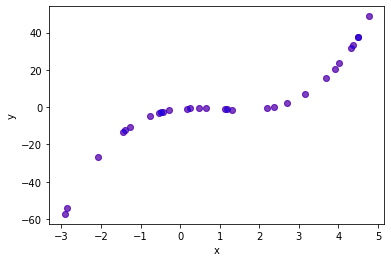

In [33]:
#ms = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,80, 90,100]
ms = [2,3,4,5,6,7,8,9,10]

for m in ms:
    print(m)
    X = create_X(m)
    alpha = compute_alpha(X, ys)
    plot_predictions(alpha, m, test=False)

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?

In [26]:
def compute_loss(y_est, ys):
    return ((y_est - ys)**2).sum()

In [27]:
def find_loss(alpha, m, test=True):
    # we are using "new" data now.
    if test:
        x = (np.random.random_sample(30) * 8) - 3
    else:
        x = xs
        
    y_est = []
    for i in range(len(list(x))):
        y_est.append(h(list(x)[i],alpha, m))
        
    loss = compute_loss(y_est, ys)
    
    return loss

In [28]:
ms = range(2,10)
losses = []

for m in ms:
    X = create_X(m)
    alpha = compute_alpha(X, ys)
    losses.append(find_loss(alpha, m, test=False))

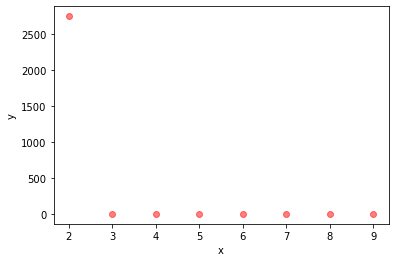

In [29]:
plt.scatter(ms, losses, alpha=0.5, c="red")
# plt.title('')
plt.xlabel('x')
plt.ylabel('y')
#plt.ylim(0,0.1)
#plt.xlim(0,20)
plt.show()